# Handling Missing Values

When working with data, it’s very common for data scientists to come across missing values. Handling these missing values is important because most machine learning algorithms cannot work with them properly. Even if some algorithms like KNN and Naive Bayes can handle missing data, the results may not be accurate. That’s why managing missing values carefully is important to get good model performance.

Just like with other steps in data analysis, there isn’t one method that works for every situation. Different problems, like time series, machine learning, or regression, may need different approaches. So, it’s hard to give one general solution.

In this document, we will look at the types of missing values and different ways to handle them.



#### Types of missing values

##### 1. Missing Completely at Random (MCAR)

In this case, missing values happen purely by chance, with no connection to any other data in the dataset. There is no pattern behind why the data is missing.
We can say that every data point has an equal chance of being missing.

Example:
Imagine after a customer service call, customers are asked to rate their experience. Some customers may choose to give feedback, and some may not — purely by their own choice, without any link to how good or bad their experience was.
Here, the missing values in the feedback column would be considered MCAR.

##### 2. Missing at Random (MAR)

In this case, missing values are not completely random. Instead, the missingness can be linked to other available information in the dataset.
In other words, whether a value is missing may depend on another variable.

Example:
Imagine a survey at a dermatology clinic that asks people about their gender and skincare routine. Suppose most women respond, but many men choose not to answer.
Here, the missing data in the skincare routine column is related to gender. So, the missing values are considered MAR.

##### 3. Missing Not at Random (MNAR)

In this case, missing values are not random and cannot be explained by the available data.
The missingness is related to information that we do not have, making it more difficult to handle.

Example:
In a survey, people with higher incomes might choose not to reveal their exact earnings.
Since the reason for missing data is linked to the hidden (unobserved) information, it is considered MNAR.

##### How to know if the dataset has missing values?

Missing values are usually represented in the form of Nan or null or None in the dataset.


In [22]:
# Example (using Pandas):

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('./Titanic-Dataset.csv')
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**df.isnull().sum()** gives the features name along with the count of null values for that particular feature.

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### What are the ways to deal with missing data?

#### 1. Deleting the column with missing data

If a column has a large number of missing values — meaning most of its entries are NULL — it may be better to drop the entire column.

Example:
In our dataset, the Cabin column has 687 missing values out of 891 total entries. Since more than half of the values are missing, it makes sense to simply remove this column

In [24]:
df = df.drop(['Cabin'],axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

#### 2. Deleting Rows with Missing Data

In this method, we remove any row that contains at least one missing (NULL) value.

However, this is usually not the best approach because data is valuable, and deleting rows can result in the loss of important information.
Even if only one column is missing, the entire row gets deleted.

For example, if most rows have some missing values, using this method could lead to losing a large part — or even all — of your dataset.

In [25]:
# Deletes the rows which has atleast one null value

updated_df = df.dropna(axis=0, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


Out of the 891 rows, 177 rows has age as NULL and 2 rows with embark_town as NULL. On deletion of those rows we get 712 rows as a result.

#### 3. Imputing Missing Values with Mean/Median

For columns with numeric continuous values, missing data can be filled in using the mean, median, or mode of the remaining values in the column.
This method helps prevent data loss compared to deleting rows.

Imputing using the mean or median is a statistical way to handle missing values. It works well when only a small number of values are missing. However, if there are many missing values, using the mean or median might reduce the variation in the data.

- Mean imputation works well for data that is normally distributed.

- Median imputation is better for skewed data.

However, this method has a few downsides:

- It can’t be used for categorical data.

- Mean imputation is sensitive to outliers, and may not accurately represent the central tendency of the data.

In [26]:
print(df['Age'].fillna(df['Age'].mean(), inplace=True))


df.isnull().sum()

None


/var/folders/7x/2gm7rkgn3xv_p892v01706fm01_4y5/T/ipykernel_92420/949133264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df['Age'].fillna(df['Age'].mean(), inplace=True))


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### 3.1 Imputing missing values with mean/median of group

We can fill the missing values using group level statistics in the following manner.

#Mean

df['age'] = df['age'].fillna(df.groupby('class')['age'].transform('mean'))

#Median

df['age'] = df['age'].fillna(df.groupby('class')['age'].transform('median'))



#### 4. Imputation Method for Categorical Columns

For columns with categorical data (either strings or numbers), missing values can be filled by replacing them with the most frequent category in the column.

When to use:
- If the missing values are few, replace them with the most common category.
- If the number of missing values is large, consider replacing them with a new category, such as "Unknown" or "Missing."

This approach ensures that you retain the structure of your categorical data while handling the missing values effectively.





#### 5. Forward Fill and Backward Fill

Forward Fill (ffill) and Backward Fill (bfill) are techniques to handle missing values by using nearby data points.

- Forward Fill (ffill): Fills the missing value with the last available non-missing value.

- Backward Fill (bfill): Fills the missing value with the next available non-missing value.


**#Forward fill missing values in a specific column**

df['column_name'].fillna(method='ffill', inplace=True)

**#Forward fill missing values in the entire DataFrame**

df.ffill(inplace=True)

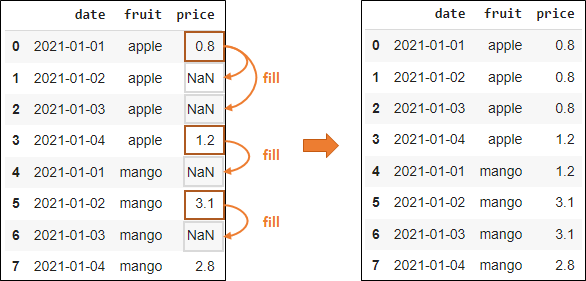



**#Backward fill missing values in a specific column**

df['column_name'].fillna(method='bfill', inplace=True)

**#Backward fill missing values in the entire DataFrame**

df.bfill(inplace=True)

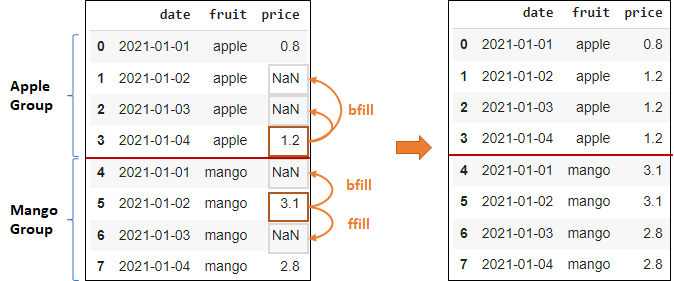



#### 6. Interpolation

Interpolation is a method of filling missing values by estimating them based on nearby data points.

It is mainly used for time-series data or when the missing values are expected to follow a smooth trend.

This technique is also helpful when the data is sampled at regular intervals.

You can think of interpolation as creating a weighted average, where closer points have more influence than distant ones.



In [37]:
# Linear interpolation for a specific column
df['column_name'].interpolate(method='linear', inplace=True)

# Linear interpolation for the entire DataFrame
df.interpolate(method='linear', inplace=True)

#### 7. Model-Based Imputation (Regression Model)

In earlier methods, we did not use the relationships between the missing value and other variables.

In model-based imputation, we build a predictive model to estimate missing values using other features in the dataset.

If the missing value is in a continuous variable, a regression model can be used.

If it’s in a categorical variable, a classification model can be used.

This approach helps make better use of the available information to fill in missing data.

#### 8. Multiple Imputation

Multiple Imputation is an advanced method for filling missing values using a technique called Iterative Imputer from the scikit-learn library.

It follows the MICE (Multiple Imputation by Chained Equations) approach, where missing values are filled one column at a time, using the other columns as predictors.

For example, if 'Age' and 'Fare' are closely related (people paying lower fares are younger, and higher fares are paid by older people), we can use 'Fare' to better estimate the missing 'Age' values.
This method considers multiple features together, making it a multivariate approach for more accurate imputations.

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols = ['SibSp', 'Fare', 'Age']
X = df[cols]

impute_it = IterativeImputer()
impute_it.fit_transform(X)

Now let’s see how IterativeImputer works. For all rows in which ‘Age’ is not missing, sci-kit learn runs a regression model. It uses ‘Sib sp’ and ‘Fare’ as the features and ‘Age’ as the target. And then, for all rows for which ‘Age’ is missing, it makes predictions for ‘Age’ by passing ‘Sib sp’ and ‘Fare’ to the training model. So it actually builds a regression model with two features and one target and then makes predictions on any places where there are missing values. And those predictions are the imputed values.

#### 9. K-Nearest Neighbors Imputations (KNNImputer)

Imputing missing values using k-Nearest Neighbors (KNN) is a technique where missing values are estimated based on the values of their nearest neighbors in the feature space.

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

df = df[["survived", "pclass", "sex", "sibsp", "parch", "fare", "age"]]
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Assuming df is your DataFrame with missing values
# For demonstration purposes, let's assume 'Age' is the target variable

# Separate the target variable and features
y = df['age']
X = df.drop(['age'], axis=1)

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
X_imputed = imputer.fit_transform(X)